In [0]:
%cd /content/drive/Shared\ drives/Covid-19/

[Errno 2] No such file or directory: '/content/drive/Shared drives/Covid-19/'
/content


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
drive.flush_and_unmount()

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
dataset = pd.read_csv("train.csv")    

In [0]:
data1=pd.read_csv("kid-data/covid_19_clean_complete.csv")

In [0]:
data1.shape

(17136, 8)

In [0]:
data1.head

<bound method NDFrame.head of                  Province/State  Country/Region  ...  Deaths  Recovered
0                           NaN     Afghanistan  ...       0          0
1                           NaN         Albania  ...       0          0
2                           NaN         Algeria  ...       0          0
3                           NaN         Andorra  ...       0          0
4                           NaN          Angola  ...       0          0
...                         ...             ...  ...     ...        ...
17131                       NaN           Burma  ...       0          0
17132                  Anguilla  United Kingdom  ...       0          0
17133    British Virgin Islands  United Kingdom  ...       0          0
17134  Turks and Caicos Islands  United Kingdom  ...       0          0
17135                       NaN      MS Zaandam  ...       0          0

[17136 rows x 8 columns]>

In [0]:
data1.describe()

Lat          Long      Confirmed        Deaths     Recovered
count  17136.000000  17136.000000   17136.000000  17136.000000  17136.000000
mean      22.238772     23.356497     523.227766     20.676237    160.086018
std       24.364494     71.494642    4798.964492    267.670675   2252.351806
min      -41.454500   -135.000000       0.000000      0.000000      0.000000
25%        8.599125    -20.026050       0.000000      0.000000      0.000000
50%       23.914900     20.921188       0.000000      0.000000      0.000000
75%       41.316075     85.953175      28.000000      0.000000      1.000000
max       71.706900    178.065000  140886.000000  10779.000000  62570.000000

In [0]:
data1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [0]:
print("Number of Country_Region : ", data1['Country/Region'])

Number of Country_Region :  0           Afghanistan
1               Albania
2               Algeria
3               Andorra
4                Angola
              ...      
17131             Burma
17132    United Kingdom
17133    United Kingdom
17134    United Kingdom
17135        MS Zaandam
Name: Country/Region, Length: 17136, dtype: object


In [0]:
data2=data1[data1['Country/Region']=='US']

NameError: ignored

In [0]:
data2

Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
225              NaN             US  37.0902  ...          1      0          0
477              NaN             US  37.0902  ...          1      0          0
729              NaN             US  37.0902  ...          2      0          0
981              NaN             US  37.0902  ...          2      0          0
1233             NaN             US  37.0902  ...          5      0          0
...              ...            ...      ...  ...        ...    ...        ...
16101            NaN             US  37.0902  ...      65778    942        361
16353            NaN             US  37.0902  ...      83836   1209        681
16605            NaN             US  37.0902  ...     101657   1581        869
16857            NaN             US  37.0902  ...     121478   2026       1072
17109            NaN             US  37.0902  ...     140886   2467       2665

[68 rows x 8 columns]

In [0]:
set(data2['Deaths'])

{0,
 1,
 6,
 7,
 11,
 12,
 14,
 17,
 21,
 22,
 28,
 36,
 40,
 47,
 54,
 63,
 85,
 108,
 118,
 200,
 244,
 307,
 417,
 557,
 706,
 942,
 1209,
 1581,
 2026,
 2467}

In [0]:
deaths_total = data2.groupby(['Date'])

NameError: ignored

In [0]:
deaths_total.tail()

Deaths
          sum
Date         
3/5/20     12
3/6/20     14
3/7/20     17
3/8/20     21
3/9/20     22

In [0]:
confirmed_total=data2.groupby(['Date']).agg({'Confirmed':['sum']})

In [0]:
confirmed_total

In [0]:
total_date = deaths_total.join(confirmed_total)

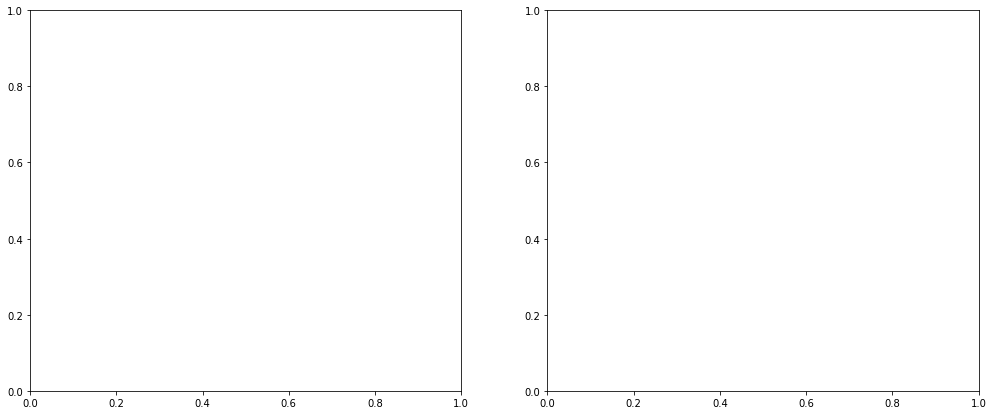

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

In [0]:
deaths_total.plot(ax=ax1)
ax1.set_title("Global death cases")
ax1.set_ylabel("Number of cases")
ax1.set_xlabel("Date")
confirmed_total.plot(ax=ax2, color='orange')
ax2.set_title("Global confirmed cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

Text(0.5, 20.200000000000003, 'Date')

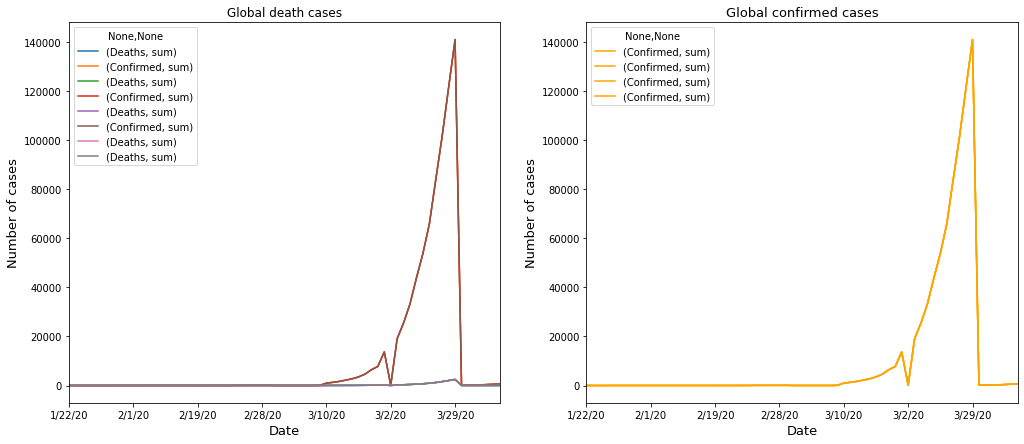

In [0]:
fig

In [0]:
dataset.shape

(19698, 6)

In [0]:
dataset.head()

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0

In [0]:
dataset.describe()

Id  ConfirmedCases    Fatalities
count  19698.000000    19698.000000  19698.000000
mean   14684.000000      418.251447     16.258097
std     8487.237333     3985.736398    228.217866
min        1.000000        0.000000      0.000000
25%     7334.250000        0.000000      0.000000
50%    14684.000000        0.000000      0.000000
75%    22033.750000       22.000000      0.000000
max    29367.000000    92472.000000  10023.000000

In [0]:
# set(dataset.Country_Region)
US_dataset = dataset[dataset['Country_Region']=='US']

In [0]:
US_dataset.head()

Id Province_State  ... ConfirmedCases Fatalities
15008  22401        Alabama  ...            0.0        0.0
15009  22402        Alabama  ...            0.0        0.0
15010  22403        Alabama  ...            0.0        0.0
15011  22404        Alabama  ...            0.0        0.0
15012  22405        Alabama  ...            0.0        0.0

[5 rows x 6 columns]

In [0]:
# set(US_dataset.Date)
set(US_dataset.ConfirmedCases)

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 60.0,
 62.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 114.0,
 115.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 134.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 142.0,
 144.0,
 146.0,
 149.0,
 152.0,
 154.0,
 155.0,
 156.0,
 157.0,


In [0]:
US_dataset.shape

(3618, 6)

In [0]:
confirmed_cases=[]
confirmed_cases.append(0)
for i in range(US_dataset.shape[0]-1):
  confirmed_cases.append(US_dataset['ConfirmedCases'].iloc[i+1]-US_dataset['ConfirmedCases'].iloc[i])
len(confirmed_cases)

3618

In [0]:
set(US_dataset['Province_State'])

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [0]:
dates= sorted(set(US_dataset['Date']))

In [0]:
import numpy as np

Y =[]
for i in dates:
  temp = sum(US_dataset[US_dataset['Date']==i]['ConfirmedCases'])
  if temp !=0:
    Y.append(temp)
Y = np.array(Y)


X=[]
for i in range(19):
  X.append(i)
X = np.array(X)




In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),Y)
# regressor.predict()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(2).fit_transform(X.reshape(-1,1))

In [0]:
X_poly[:,2]

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.,
       121., 144., 169., 196., 225., 256., 289., 324.])

In [0]:
regressor.predict(X_poly[:2].reshape(-1,1))

array([-16510.8245614 , -22468.47368421, -22468.47368421, -16510.8245614 ,
       -16510.8245614 , -16510.8245614 ])

In [0]:
import seaborn as sea

sea.scatterplot(X_poly[:2], regressor.predict(X_poly[:2].reshape(-1,1)), color='red')
sea.scatterplot(X,Y, color='blue')

Exception: ignored